In [2]:
#utilizamos pytorch
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 1. Neurona artificial

Una neurona artificial tiene entradas $X$, salidas $Y$ y un conjunto de parámetros a aprender. En este caso experimentaremos con una red neuronal que hace regresión lineal. Para este ejemplo, nuestra red tiene una sola entrada $x$ y una sóla salida $y$. La red computa una función lineal del tipo $y = wx + b$. Primero definimos el conjunto de datos para este problema. Los graficamos para tener una idea de estos datos.

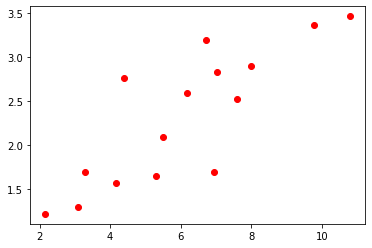

In [3]:
# Dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

plt.plot(x_train, y_train, 'ro') #'ro': red
plt.show()

La neurona que queremos crear es conocida como una unidad lineal. En PyTorch podemos crear neuronas de este tipo usando Linear.

La principal estructura de PyTorch es:
- Tensores
- 

In [ ]:
input_size = 1
output_size = 1
#solo toma un dato de entrada: 1
#solo toma un dato de salida: 1
model = nn.Linear(input_size, output_size)

print(model)
print(" ")
# Una neurona lineal tiene como parámetros un conjunto de pesos w y un bias b
print("Veamos peso:")
print(model.weight)
print(" ")
print("Veamos bias:")
print(model.bias)

Linear(in_features=1, out_features=1, bias=True)
 
Veamos peso:
Parameter containing:
tensor([[0.0522]], requires_grad=True)
 
Veamos bias:
Parameter containing:
tensor([-0.8578], requires_grad=True)


Para poder aprender el modelo lineal desde los datos, necesitamos definir dos cosas: la función de error de la neurona y el método de optimización para el aprendizaje. Nosotros usamos lo siguiente:


*   Función de error: Mean squared error  $(y - \hat y)^2$
*   Optimización: Stochastic Gradient Descent


Es necesario definir algunos hiperparámetros para el algoritmo de aprendizaje


*   Número de épocas - cantidad de iteraciones del algoritmo de optimización
*  Ratio de aprendizaje - velocidad con la que el algoritmo hace las actualizaciones de los parámetros en cada iteración.


Recordar el seudo-código base general:

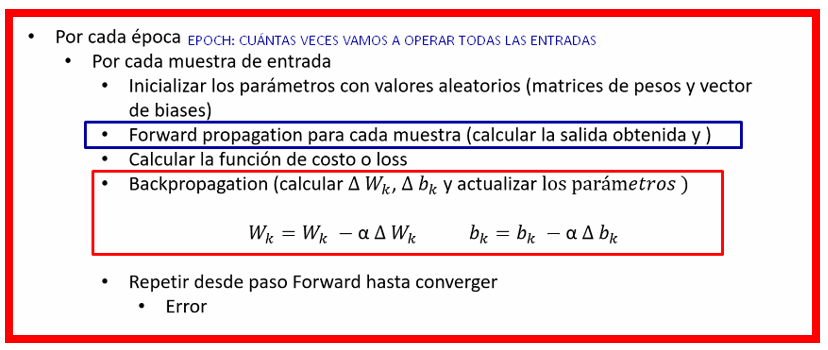

In [ ]:
# Regresión lineal

# Hiperparámetros
num_epochs = 300 #son las iteraciones para forward y backward
                 #(en caso regrese con el gradient descent)
                 #esto implica 'N' pasadas (en este caso, 300)
learning_rate = 0.001

# Loss and optimizer
#Funcion de costo ('criterion')
criterion = nn.MSELoss()

#Funcion de optimización de la función de costo ('Stochastic Gradient Descent')
#recibe los pesos y los bias
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

#### ALGORITMO DE ENTRENAMIENTO BASE

# Entrenar | por cada época
for epoch in range(num_epochs):
    # Convertir a tensores
    # pyTroch lo hace automatizadamente
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Definimos el Forward Propagation
    # 1. Ingresar los inputs a la red ('model')
    # 2. Evaluamos los otputs generados con la función de costo ('criterion')
    # Recordar que nuestro 'target' es nuestro y_train
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward y optimizar
    # Reseteamos los valores de la optimización
    optimizer.zero_grad()
    # Aplicamos el backward desde la función de pérdida
    # que fue el último criterio 
    loss.backward()

    #actualizamos los valores de optimización para el siguiente EPOCH
    optimizer.step()
    
    #acá simplemente imprimimos los valores de pérdida cada 25 EPOCHS
    if (epoch+1) % 25 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [25/300], Loss: 0.2350
Epoch [50/300], Loss: 0.2341
Epoch [75/300], Loss: 0.2333
Epoch [100/300], Loss: 0.2325
Epoch [125/300], Loss: 0.2317
Epoch [150/300], Loss: 0.2309
Epoch [175/300], Loss: 0.2301
Epoch [200/300], Loss: 0.2293
Epoch [225/300], Loss: 0.2285
Epoch [250/300], Loss: 0.2278
Epoch [275/300], Loss: 0.2270
Epoch [300/300], Loss: 0.2263


Por ahora podemos saber que nuestro modelo fue aprendido bien si graficamos la línea que corresponde a los parámetros aprendidos.

VEAMOS PESOS Y BIAS
Parameter containing:
tensor([[0.3550]], requires_grad=True)
Parameter containing:
tensor([0.0863], requires_grad=True)
******************************
[2. 3. 4. 5. 6. 7. 8. 9.]
[[0.79635817 1.1514022  1.5064462  1.8614902  2.2165344  2.5715783
  2.9266224  3.2816665 ]]


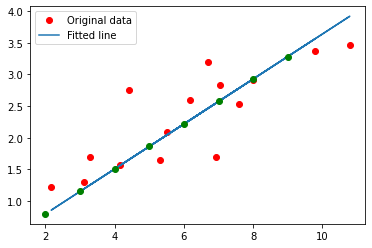

In [ ]:
# Plot the graph
#Definimos un valor de predicciones
#Recordar que ingresa un TENSOR, no un numpy o array directo
#'detach()' es equivalente a .values (solo los valores de la matriz)
predicted = model(torch.from_numpy(x_train)).detach().numpy()

#ploteamos la diferencia entre los datos originales
#y los predichos
#XTRAIN - YTRAIN
#XTRAIN - YPREDICTED FROM TRAIN
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
#plt.show()

#Imprimimos pesos y bias
print("VEAMOS PESOS Y BIAS:")
print(model.weight)
print(model.bias)
print("***" * 10)

#definimos un equivalente al XTRAIN 
xx = np.asarray(range(2,10), dtype=np.float32)

#definimos el modelo segun # y = mx+b
#extraemos nuevos valores de Y según los pesos y bias de la red inicial
#ingresamos XX para que sea un torch y obtener los Y, es decir, predecir
#utilizando pesos ('model.weight') y bias/threshold ('model.bias')
#en la nomenclatura formular tradicional de una regresión lineal
yy = model.weight*torch.from_numpy(xx) + model.bias

#extraemos los valores de 'Y' predichos en la fórmula en numpy desde el tensor
yy = yy.detach().numpy()

print(xx)
print(yy)

plt.plot(xx, yy[0], 'go')
plt.show()

# 2. Creando un modelo de red neuronal

In [ ]:
# Datos
#X: tres datos de entrada
x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]], dtype=np.float32)

#Y: un dato de salida (nótese un dato de salida x cada bloque de 3 datos de entrada)
y = np.array([[0],[1],[1],[0]], dtype=np.float32)
X = torch.from_numpy(x)
Y = torch.from_numpy(y)
#¿Cómo se representaría esta relación de X e Y, siendo X un bloque de 3 datos? 
#Ver la siguiente imagen:

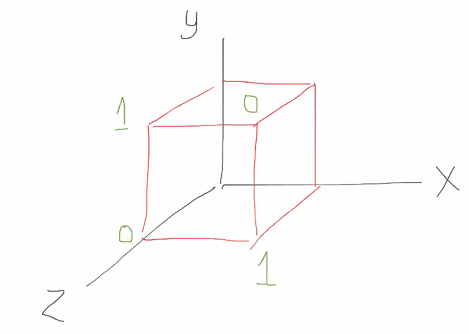

In [ ]:
#Datito: ¿cuál es la diferencia entre 'x' y X? 
print(x)
print(X)
#rpta: el formato. 'x' es numpy array y 'X' son tensores

[[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
tensor([[0., 0., 1.],
        [0., 1., 1.],
        [1., 0., 1.],
        [1., 1., 1.]])


In [ ]:
#como ver todos los objetos de PyTorch?
torch.*?

In [ ]:
#definiciones del MSE por ejemplo
torch.nn.MSELoss??

In [ ]:
# Modelo de red neuronal
class RedNeuronal(nn.Module):
  def __init__(self):
    super().__init__()
    #define el constructor
    #sequential: es la secuencia de capas
    #ingresamos dos parametros: la cantidad de capas y la funcion de activacion
    #nn.Linear (X,Y): dfefine el tipo de capa y la cantidad de entradas X y salidas Y
    #nn.Sigmoid(): ingresamos la función de activación
    #Note que empieza nn.FUNCION(X, Y) --> nn.FUNCION SIG CAPA(Z, P), donde Y == Z
    self.net = nn.Sequential(nn.Linear(3,4),
                             nn.Sigmoid(), 
                             nn.Linear(4,1), 
                             nn.Sigmoid()
                             )

  #definimos el forward propagation 
  #simplemente es el ingreso de las entradas 
  #hacia el método 'self.net' definido previamente
  #recordar que el 'self.net' es la red definida 
  def forward(self, input):
    y = self.net(input)
    return y

In [ ]:
# Entrenamiento de una época
def train_epoch(model, data, label, criterion, optimizer):
  #recordar: 'model' es igual a la red neuronal
  #funcion que entrena solo una época
  model.train() # Enable
  #lista de pérdidas para mostrar cómo va el aprendizaje
  losses = []
  
  #reseteamos el proceso de optimización 
  #para que pueda ingresar el backward de ser el caso
  optimizer.zero_grad()

  #llamamos a Forward Propagation
  y = model(data)
  
  #hacemos la comparación de Y con los labels de entrenamiento
  loss = criterion(y, label)
  
  #computamos el backward propagation que parte de la función de costo
  loss.backward()
  
  #agregamos los pasos de la optimización
  optimizer.step()

  #agregamos a la lista de valores de pérdida los nuevos datos optimizados
  losses.append(loss.data.numpy())
  
  return losses

In [ ]:
# Hiperparámetros para la funcion TRAIN_EPOCH
# 'lr' es el Learning Rate | Optim es la función de optimización
# en vez de SGD podemos usar 'ADAM'
net = RedNeuronal()
#opt = torch.optim.SGD(net.parameters(), lr=.01)
opt = torch.optim.Adam(net.parameters(), lr=.01)
criterion = nn.MSELoss()

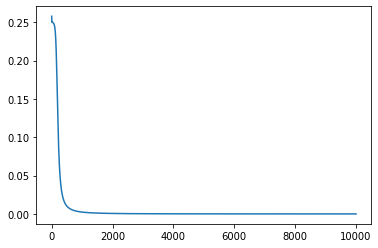

In [ ]:
# Entrenamiento
e_losses = []
num_epoch = 10000

#iteramos por cada EPOCH y guardamos los valores de pérdida
for e in range(num_epoch):
  e_losses += train_epoch(net, X, Y, criterion, opt)

#ploteamos los valores de pérdida
plt.plot(e_losses)

In [ ]:
# Predicción 
# recordar que esto debe hacerse siempre una vez el modelo haya entrenado
# y que se haya optimizado con el backward.
output = net(X)
print(output.detach().numpy())

[[5.9642602e-04]
 [9.9858177e-01]
 [9.9719799e-01]
 [2.9946035e-03]]
